1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [4]:
# Imports 

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("../data/iris.csv")

# To encode our target column
le = preprocessing.LabelEncoder()
le.fit(df["variety"])
df["target"] = le.transform(df["variety"])

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


### Mediante knn, predice qué planta se corresponde con los ejemplos: [15.7,2.8,9.5,0.1] y [1.7,3.8,4.5,11.3] para k=3 y k=7

In [5]:
# Independent variables
X = np.array(df.drop(["variety", "target"], axis = 1))

# Dependent variable
y = np.array(df["target"])

# Test and Train data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Model

ks = [3, 7]
examples = [[15.7,2.8,9.5,0.1], [1.7,3.8,4.5,11.3]]


for example in examples:
    for k in ks:
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(x_train, y_train)

        prediction = model.predict(np.array(example).reshape(1, -1))
        prediction = le.inverse_transform(prediction)[0]

        print(f"For observation = {example} and k = {k}:\t{prediction}")

For observation = [15.7, 2.8, 9.5, 0.1] and k = 3:	Virginica
For observation = [15.7, 2.8, 9.5, 0.1] and k = 7:	Virginica
For observation = [1.7, 3.8, 4.5, 11.3] and k = 3:	Virginica
For observation = [1.7, 3.8, 4.5, 11.3] and k = 7:	Virginica


### ¿Qué acierto tiene tu modelo para k=3, k=7? (score)

In [17]:
# Model

ks = [3, 7]

for k in ks:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)

    print(f"Model with {k} neighbors")
    print(f"train score:\t{train_score}")
    print(f"test score:\t{test_score}")
    print("-" * 50)

Model with 3 neighbors
train score:	0.95
test score:	0.9666666666666667
--------------------------------------------------
Model with 7 neighbors
train score:	0.9666666666666667
test score:	1.0
--------------------------------------------------


### Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.

In [52]:
scores = {}

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)

    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)

    scores[k] = {"train_score": train_score, "test_score": test_score}

scores_df = pd.DataFrame(scores).T
scores_df.head()

,train_score,test_score
1,1.000,1.000000
2,0.975,0.966667
3,0.950,0.966667
4,0.950,1.000000
5,0.950,0.966667


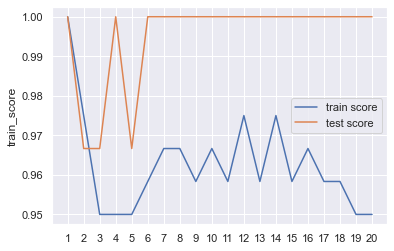

In [50]:
sns.set_theme()

ax = sns.lineplot(x = scores_df.index, y = scores_df["train_score"])
ax = sns.lineplot(x = scores_df.index, y = scores_df["test_score"])


plt.legend(["train score", "test score"])
ax.set_xticks(scores_df.index)

plt.show()

Parece que a partir de 6 vecinos, el modelo predice los nuevos datos con un 100% de fiabilidad.

### Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [53]:
# Test and Train data
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.6, random_state = 0)


scores_2 = {}

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train_2, y_train_2)

    train_score = model.score(x_train_2, y_train_2)
    test_score = model.score(x_test_2, y_test_2)

    scores_2[k] = {"train_score": train_score, "test_score": test_score}

scores_df_2 = pd.DataFrame(scores_2).T
scores_df_2.head()

,train_score,test_score
1,1.000000,0.922222
2,0.983333,0.888889
3,0.983333,0.944444
4,1.000000,0.911111
5,0.983333,0.922222


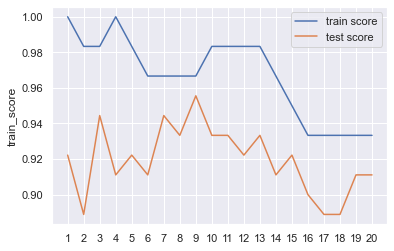

In [54]:
sns.set_theme()

ax = sns.lineplot(x = scores_df_2.index, y = scores_df_2["train_score"])
ax = sns.lineplot(x = scores_df_2.index, y = scores_df_2["test_score"])


plt.legend(["train score", "test score"])
ax.set_xticks(scores_df_2.index)

plt.show()

Vemos que usando un 40% de los datos para training suceden principalmente dos cosas:

1. El score disminuye tanto para los datos train como para los datos test, lo cual es lógico porque tiene menos datos para identificar los patrones.
2. Ahora el modelo predice mejor los datos del train que del test, esto implica que el modelo está identificando más detalles especificos de las observaciones que tiene que patrones generalizables a otros datos.

### Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [56]:
df2 = df[df["variety"] != "Setosa"]

# Independent variables
X2 = np.array(df2.drop(["variety", "target"], axis = 1))

# Dependent variable
y2 = np.array(df2["target"])

# Test and Train data
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [57]:
scores_3 = {}

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train_3, y_train_3)

    train_score = model.score(x_train_3, y_train_3)
    test_score = model.score(x_test_3, y_test_3)

    scores_3[k] = {"train_score": train_score, "test_score": test_score}

scores_df_3 = pd.DataFrame(scores_3).T
scores_df_3.head()

,train_score,test_score
1,1.0000,0.9
2,0.9750,0.9
3,0.9750,0.9
4,0.9750,0.9
5,0.9625,0.9


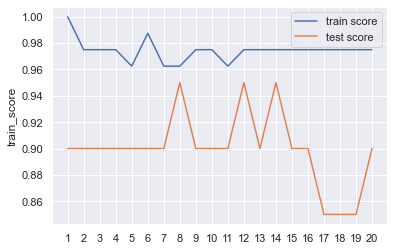

In [58]:
sns.set_theme()

ax = sns.lineplot(x = scores_df_3.index, y = scores_df_3["train_score"])
ax = sns.lineplot(x = scores_df_3.index, y = scores_df_3["test_score"])


plt.legend(["train score", "test score"])
ax.set_xticks(scores_df_3.index)

plt.show()

En este caso, comparado con el original con todos los datos, el modelo ha empeorado. Parece que al hacer las comparaciones con los vecinos, ahora que solo tiene dos opciones le está costando más identificar a que grupo pertenece.

Adicionalmente, vemos que lo hace mejor con train data que con test data.

Es posible que todo esto se debe a que el algoritmo simplemente tiene menos información

### ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

Este algoritmo lo hace bastante bien en sus predicciones (>90%), aunque es cierto que dependiendo del número de vecinos que cogamos estos resultados pueden variar bastante, mientras que en el caso de la regresión logística, parece más consistente.

